In [224]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import gzip
import time
import gensim
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

In [11]:
# Load and Save the List into the files
def load(file_name):
    # load the model
    stream = gzip.open(file_name, "rb")
    model = pickle.load(stream)
    stream.close()
    return model

def save(file_name, model):
    # save the model
    stream = gzip.open(file_name, "wb")
    pickle.dump(model, stream)
    stream.close()

In [5]:
dataset = read_csv("/home/jake/Desktop/item2vec/raw_dataset/ware_subgroup.csv")

maps = {}

for i, row in dataset.iterrows():
    if row.ware_subgroup in maps:
        maps[row.ware_subgroup].append(str(row['CLIENT_REG_CODE']))
    else:
        listTemp = []
        listTemp.append(str(row['CLIENT_REG_CODE']))
        maps[row.ware_subgroup] = listTemp

sentences = []
for item in maps.values():
    sentences.append(item)
    
save("dataset/LIST_ware_subgroup_based_userid", sentences)

In [179]:
sentences = load('dataset/LIST_ware_subgroup_based_userid')
model = gensim.models.Word2Vec(sentences, size = 200, window = 8, min_count = 75, workers = 4)

# Save the traineed word2vec model
#model.save('savedmoel_200_8_100')
# Load the trainede word2vec model
#model = gensim.models.Word2Vec.load('savedmoel_200')

In [180]:
model.save('savedmoel_200_8_75')

In [341]:
model = gensim.models.Word2Vec.load('savedmoel_200')

There are 21235 vectors. There dimensions are 200
There are 21235 2Dvectors. There dimensions are 2


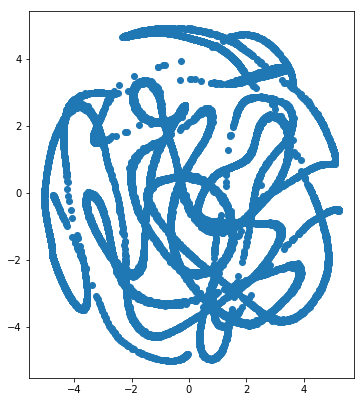

In [190]:
# Word2Vec-TSNE
print ("There are", Clients_vectors.shape[0], "vectors. There dimensions are", Clients_vectors.shape[1])

Clients_vectors = np.array([model[word] for word in (model.wv.vocab)])
tsne = TSNE(n_components = 2, perplexity = 70, n_iter = 500, random_state = 0)
Clients_vectors_2d = tsne.fit_transform(Clients_vectors)
print ("There are", Clients_vectors_2d.shape[0], "2Dvectors. There dimensions are", Clients_vectors_2d.shape[1])

fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
ax = fig.add_subplot(1, 3, 1)

ax.scatter(Clients_vectors_2d[:, 0], Clients_vectors_2d[:, 1])
plt.show()

In [358]:
kmeans_clustering.labels_

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0,

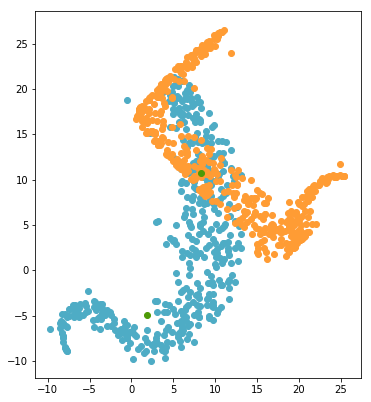

In [361]:
# Word2Vec-TSNE-Kmeans

Clients_vectors = np.array([model[word] for word in (model.wv.vocab)])

#tsne
tsne = TSNE(n_components = 2, perplexity = 70, n_iter = 500, random_state=0)
Clients_vectors_2d = tsne.fit_transform(Clients_vectors)

#kmeans
kmeans_clustering = KMeans(init='k-means++', n_clusters = 2, max_iter = 500, n_init = 30)
K_Clients_vectors = kmeans_clustering.fit_transform(Clients_vectors_2d)

#Plot
fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
ax = fig.add_subplot(1, 3, 1)

ax.scatter(Clients_vectors_2d[:, 0], Clients_vectors_2d[:, 1], color = '#4EACC5')
ax.scatter(K_Clients_vectors[:, 0], K_Clients_vectors[:, 1], color = '#FF9C34')
ax.scatter(kmeans_clustering.cluster_centers_[:, 0], kmeans_clustering.cluster_centers_[:, 1], color='#4E9A06')
plt.show()

There are 443 vectors. There dimensions are 300
There are 443 2Dvectors. There dimensions are 2


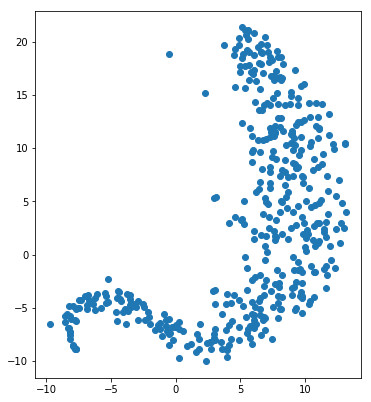

In [193]:
# Word2Vec-TSNE

Clients_vectors = np.array([model[word] for word in (model.wv.vocab)])
print ("There are", Clients_vectors.shape[0], "vectors. There dimensions are", Clients_vectors.shape[1])

tsne = TSNE(n_components = 2, perplexity = 70, n_iter = 500, random_state = 0)
Clients_vectors_2d = tsne.fit_transform(Clients_vectors)
print ("There are", Clients_vectors_2d.shape[0], "2Dvectors. There dimensions are", Clients_vectors_2d.shape[1])

fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
ax = fig.add_subplot(1, 3, 1)

ax.scatter(Clients_vectors_2d[:, 0], Clients_vectors_2d[:, 1])
plt.show()

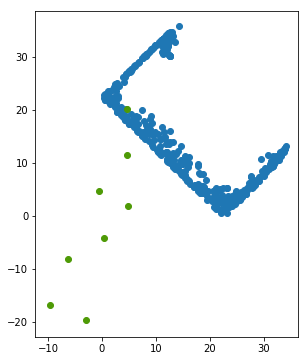

In [362]:
# Word2Vec-TSNE-Kmeans

Clients_vectors = np.array([model[word] for word in (model.wv.vocab)])
#tsne
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 500, random_state=0)
tsne.fit(Clients_vectors)

#kmeans
kmeans_clustering = KMeans()
K_Clients_vectors = kmeans_clustering.fit_transform(Clients_vectors_2d)

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 3, 1)

ax.scatter(K_Clients_vectors[:, 0], K_Clients_vectors[:, 1])
for x,y in zip(kmeans_clustering.cluster_centers_[:,0], kmeans_clustering.cluster_centers_[:,1]):
    ax.scatter(x, y, color='#4E9A06')
plt.show()

In [300]:
dataset = pd.read_csv('AfterAgeBinning.csv')

In [301]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [304]:
dataset = dataset.fillna(dataset.mean())

In [311]:
Y = dataset["label"]
X = dataset.drop("label",1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.01)

In [313]:
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

In [314]:
X_test.shape

(10665, 29)

In [338]:
# Kmeans
k_means = KMeans(init='k-means++', n_clusters = 10, n_init=10)
X_test = k_means.fit_transform(X_test)

In [339]:
#tsne
tsne = TSNE(n_components = 2, perplexity = 25, n_iter = 200, random_state=0)
X_test_2d = tsne.fit_transform(X_test)


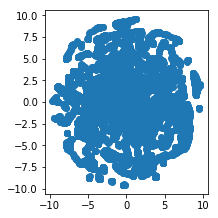

In [337]:
%matplotlib inline
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34']

ax = fig.add_subplot(1, 3, 1)

ax.scatter(X_test_2d[:,0], X_test_2d[:,1])
plt.show()

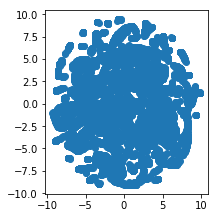

In [340]:
#Kmeans n_clusters = 10
%matplotlib inline
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34']

ax = fig.add_subplot(1, 3, 1)

ax.scatter(X_test_2d[:,0], X_test_2d[:,1])
plt.show()